# 电力数据分析

## 导入需要使用的库

In [136]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

## 读取文件信息

In [137]:
# 读取文件信息
pjm_df = pd.read_csv('res/pjm_data.csv')
pjm_df['DATE'] = pd.to_datetime(pjm_df['DATE'])     # 把字符串类型转换位datetime类型
print(pjm_df.dtypes)
pjm_df.head()

DATE     datetime64[ns]
value           float64
dtype: object


,DATE,value
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


## 将DATE分解为多个特征 
- 分解为：年、季度、 月 、年中第几天、月中第几天、周中第几天、年中第几周

In [138]:
pjm_df['year'] = pjm_df.DATE.apply(lambda x: x.year)               # 对DATE列的每一各元素都应用此方法 转换年
pjm_df['quarter'] = pjm_df.DATE.apply(lambda x: x.quarter)         # 季度
pjm_df['month'] = pjm_df.DATE.apply(lambda x: x.month)             # 月
pjm_df['dayOfYear'] = pjm_df.DATE.apply(lambda x: x.dayofyear)     # 年中第几天
pjm_df['dayOfMonth'] = pjm_df.DATE.apply(lambda x: x.day)          # 月中第几天
pjm_df['dayOfweek'] = pjm_df.DATE.apply(lambda x: x.dayofweek)     # 周中第几天
pjm_df['week'] = pjm_df.DATE.apply(lambda x: x.dayofyear//7)       # 第几周
pjm_df.head()

,DATE,value,year,quarter,month,dayOfYear,dayOfMonth,dayOfweek,week
0,2002-12-31 01:00:00,26498.0,2002,4,12,365,31,1,52
1,2002-12-31 02:00:00,25147.0,2002,4,12,365,31,1,52
2,2002-12-31 03:00:00,24574.0,2002,4,12,365,31,1,52
3,2002-12-31 04:00:00,24393.0,2002,4,12,365,31,1,52
4,2002-12-31 05:00:00,24860.0,2002,4,12,365,31,1,52


## 丢弃无用数据特征

In [139]:
drop_columns = ['DATE']
pjm_df = pjm_df.drop(labels=drop_columns,axis=1)  # 丢弃列DATE
pjm_df.head()

,value,year,quarter,month,dayOfYear,dayOfMonth,dayOfweek,week
0,26498.0,2002,4,12,365,31,1,52
1,25147.0,2002,4,12,365,31,1,52
2,24574.0,2002,4,12,365,31,1,52
3,24393.0,2002,4,12,365,31,1,52
4,24860.0,2002,4,12,365,31,1,52


## 可视化电力数据

### 各年的电力负荷平均值、最大值、最小值

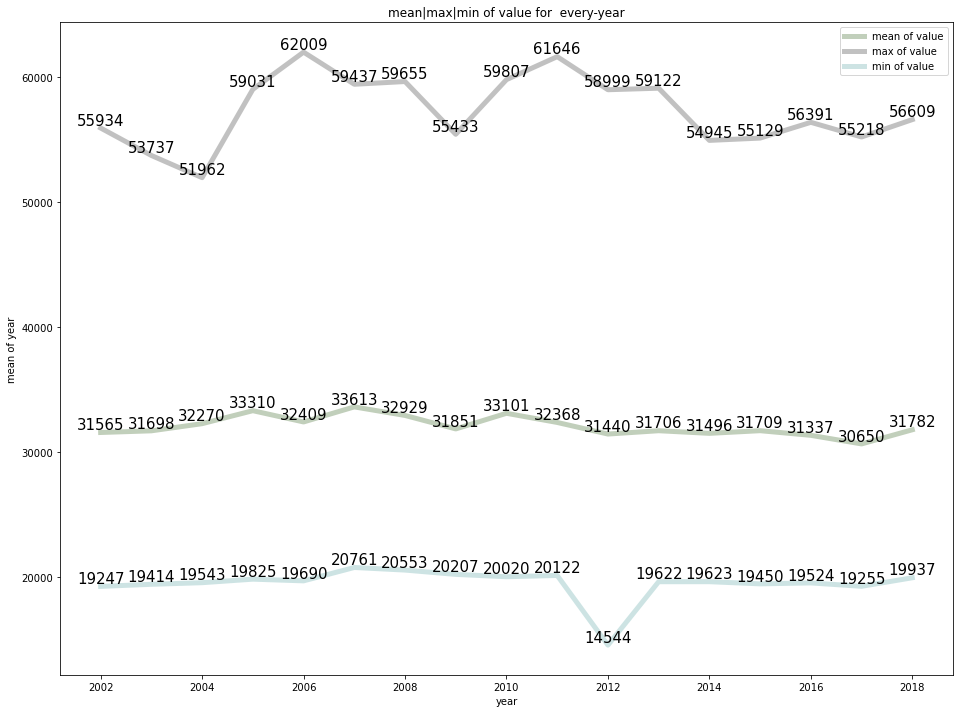

In [140]:
pjm_yv_mean = pjm_df[['year','value']].groupby(['year']).mean()        # 计算各年的电力负荷的平均值
x_mean = pjm_yv_mean.index
y_mean = pjm_yv_mean.values.reshape(len(pjm_yv_mean))
pjm_yv_max = pjm_df[['year','value']].groupby(['year']).max()        # 计算各年的电力负荷的最大值
x_max = pjm_yv_max.index
y_max = pjm_yv_max.values.reshape(len(pjm_yv_max))
pjm_yv_min = pjm_df[['year','value']].groupby(['year']).min()        # 计算各年的电力负荷的最小值
x_min = pjm_yv_min.index
y_min = pjm_yv_min.values.reshape(len(pjm_yv_min))

plt.figure(figsize=(16,12))              # 放在第一个位置，不然默认就是一个图
plt.title('mean|max|min of value for  every-year')
plt.xlabel('year')
plt.ylabel('mean of year')
plt.plot(x_mean,y_mean,color='#6856',label='mean of value',linewidth=5)
for i,j in zip(x_mean,y_mean):    # 对各点加上数值
    plt.text(i,j,'%d'%j,ha='center',va='bottom',fontsize=15)         # '%d'j：表示点上显示j的数值；ha,va：对齐动能；fontsize：字体大小
plt.plot(x_max,y_max,color='#6666',label='max of value',linewidth=5)
for i,j in zip(x_max,y_max):    # 对各点加上数值
    plt.text(i,j,'%d'%j,ha='center',va='bottom',fontsize=15)         # '%d'j：表示点上显示j的数值；ha,va：对齐动能；fontsize：字体大小
plt.plot(x_min,y_min,color='#4994',label='min of value',linewidth=5)
for i,j in zip(x_min,y_min):    # 对各点加上数值
    plt.text(i,j,'%d'%j,ha='center',va='bottom',fontsize=15)         # '%d'j：表示点上显示j的数值；ha,va：对齐动能；fontsize：字体大小
plt.legend()         # 线的标签,默认在图的右上角
plt.show()

### 统计每年每个季度的电力负荷

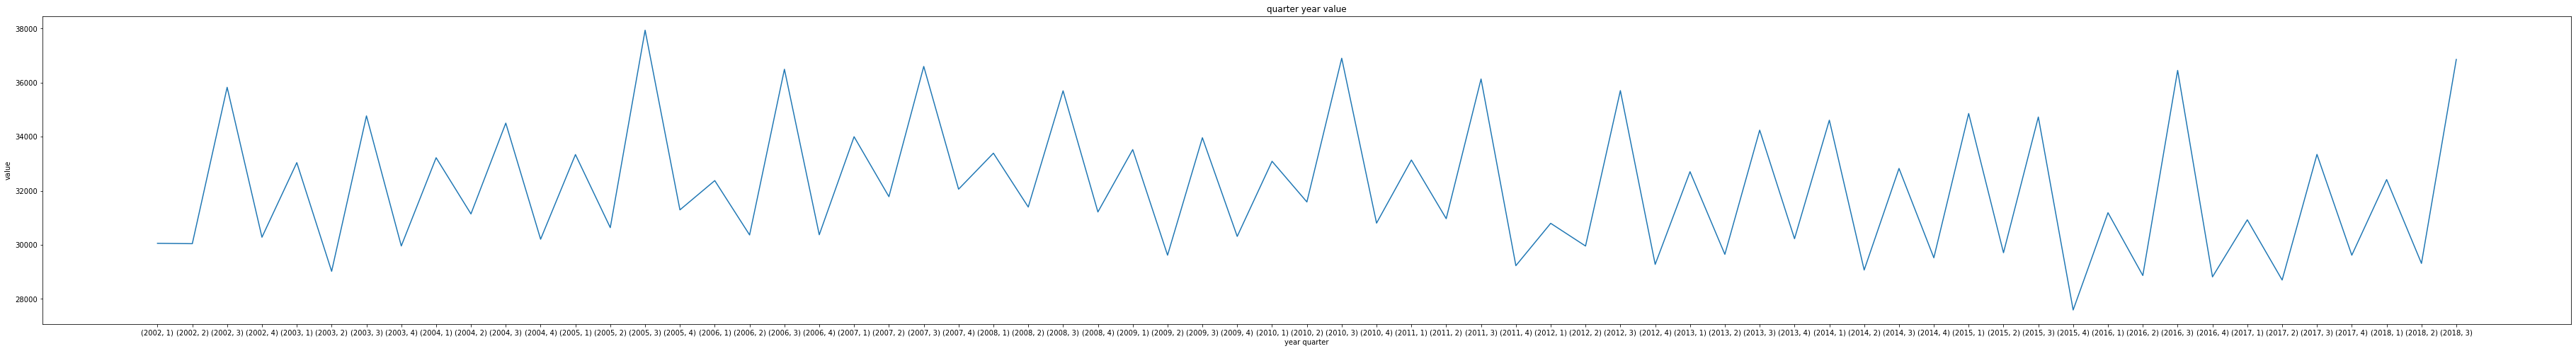

In [141]:
pjm_yqv_mean = pjm_df[['year','quarter','value']].groupby(['year','quarter']).mean()    # 计算每年每季度的电力负荷平均值
x_mean = pd.DataFrame(pjm_yqv_mean.index,columns=['yearAndQuarter']).astype('str')      # 将元组类型转为字符串
x_mean = x_mean.values.reshape(len(pjm_yqv_mean))
y_mean = pjm_yqv_mean.values.reshape(len(pjm_yqv_mean))
plt.figure(figsize=(64,8))              # 放在第一个位置，不然默认就是一个图
plt.title("quarter year value")
plt.xlabel('year quarter')
plt.ylabel('value')
plt.xticks(fontsize=10)
plt.plot(x_mean,y_mean)
plt.show()

### 统计每个季度的用电量

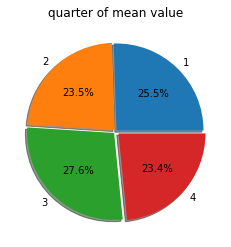

In [148]:
pjm_qv_mean = pjm_df[['quarter','value']].groupby(['quarter']).mean()    # 计算每季度的电力负荷平均值
x_mean = pjm_qv_mean.index
y_mean = pjm_qv_mean.values.reshape(len(pjm_qv_mean))

plt.figure(figsize=(8,4))              # 放在第一个位置，不然默认就是一个图
plt.title('quarter of mean value')
plt.pie(x=y_mean,labels=x_mean,autopct='%1.1f%%',shadow=True,explode=[0.01,0.02,0.03,0.04])
plt.show()

### 每个月份的平均电力负载

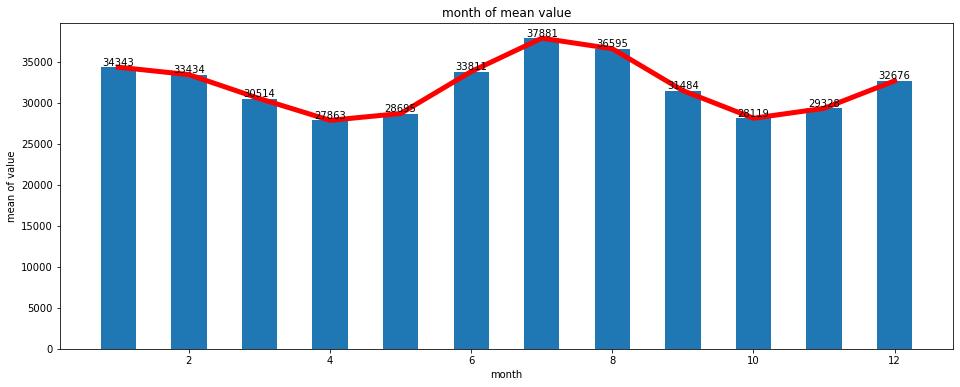

In [167]:
pjm_mv_mean = pjm_df[['month','value']].groupby(['month']).mean()    # 计算每季度的电力负荷平均值
x_mean = pjm_mv_mean.index
y_mean = pjm_mv_mean.values.reshape(len(pjm_mv_mean))

plt.figure(figsize=(16,6))              # 放在第一个位置，不然默认就是一个图
plt.title('month of mean value')
plt.xlabel('month')
plt.ylabel('mean of value')
plt.bar(x=x_mean,height=y_mean,width=0.5)
plt.plot(x_mean,y_mean,color='r',linewidth=5)
for i,j in zip(x_mean,y_mean):
    plt.text(i,j,'%d'%j,ha='center',va='bottom')
plt.show()